# **Predicting Global Stock Market Performance Using Macroeconomic Indicators 📈📊**

**Goal:** Analyze and predict global stock index performance using macroeconomic and risk indicators from 39 countries.

**Why it Matters:** Link stock market trends with economic fundamentals (important for investors, policymakers, analysts)

## **Libraries**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import (VotingRegressor, AdaBoostRegressor,
                              StackingRegressor, GradientBoostingRegressor, RandomForestRegressor)
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries successfully imported")

Libraries successfully imported


## **Data Exploration**

In [2]:
#load the dataset using pandas
data = pd.read_csv("/content/Global finance data.csv")

In [3]:
# viewing the first five rows of the dataset
data.head()

,Country,Date,Stock_Index,Index_Value,Daily_Change_Percent,Market_Cap_Trillion_USD,GDP_Growth_Rate_Percent,Inflation_Rate_Percent,Interest_Rate_Percent,Unemployment_Rate_Percent,...,Commodity_Index,Oil_Price_USD_Barrel,Gold_Price_USD_Ounce,Bond_Yield_10Y_Percent,Credit_Rating,Political_Risk_Score,Banking_Sector_Health,Real_Estate_Index,Export_Growth_Percent,Import_Growth_Percent
0,United States,2024-08-15,S&P_500,5437.2,0.34,51.2,2.8,2.9,5.50,3.7,...,1.12,77.85,2487.5,4.25,AAA,8.1,Strong,145.6,3.2,2.8
1,China,2024-08-15,Shanghai_Composite,2891.6,-0.82,12.4,5.2,0.8,3.10,5.2,...,0.98,77.85,2487.5,2.15,A+,6.7,Moderate,98.7,8.9,6.1
2,Japan,2024-08-15,Nikkei_225,36789.1,1.24,6.8,0.9,2.8,-0.10,2.4,...,1.05,77.85,2487.5,0.89,A+,8.4,Strong,89.3,5.1,4.7
3,Germany,2024-08-15,DAX,18234.5,0.67,2.9,0.3,2.2,4.50,3.1,...,1.08,77.85,2487.5,2.31,AAA,8.7,Strong,112.4,2.1,1.8
4,United Kingdom,2024-08-15,FTSE_100,8156.3,-0.15,3.1,1.1,2.0,5.25,4.2,...,1.06,77.85,2487.5,3.89,AA,7.9,Moderate,97.8,0.9,1.2


In [4]:
#getting information summary on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              39 non-null     object 
 1   Date                                 39 non-null     object 
 2   Stock_Index                          39 non-null     object 
 3   Index_Value                          39 non-null     float64
 4   Daily_Change_Percent                 39 non-null     float64
 5   Market_Cap_Trillion_USD              39 non-null     float64
 6   GDP_Growth_Rate_Percent              39 non-null     float64
 7   Inflation_Rate_Percent               39 non-null     float64
 8   Interest_Rate_Percent                39 non-null     float64
 9   Unemployment_Rate_Percent            39 non-null     float64
 10  Currency_Code                        39 non-null     object 
 11  Exchange_Rate_USD                 

The information summary shows that the dataset is perfectly clean, there are no missing values and each column has the correct data type (dtype) except from the date column which is supposed to be in datetime format.

In [5]:
data["Credit_Rating"]

,Credit_Rating
0,AAA
1,A+
2,A+
3,AAA
4,AA
5,AA
6,BBB-
7,AAA
8,BB-
9,AAA


In [6]:
#converting the date column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

In [7]:
#Checking for duplicates
print(data.duplicated().sum())

0


In [8]:
#getting the statistical summary of the dataset
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,39,2024-08-15 00:00:00,2024-08-15 00:00:00,2024-08-15 00:00:00,2024-08-15 00:00:00,2024-08-15 00:00:00,2024-08-15 00:00:00,NaN
Index_Value,39.0,59964.774359,889.3,2711.8,8156.3,23012.25,1567890.2,249537.018541
Daily_Change_Percent,39.0,0.654103,-1.23,0.31,0.67,0.89,3.45,0.834672
Market_Cap_Trillion_USD,39.0,2.912821,0.03,0.4,0.7,2.45,51.2,8.260615
GDP_Growth_Rate_Percent,39.0,2.415385,-1.9,1.15,2.4,3.15,6.8,1.874558
Inflation_Rate_Percent,39.0,11.023077,-0.4,1.95,2.8,4.3,211.4,34.828629
Interest_Rate_Percent,39.0,10.64359,-0.1,4.05,4.75,6.5,133.0,21.866714
Unemployment_Rate_Percent,39.0,5.887179,1.2,3.3,5.1,7.3,28.7,4.636138
Exchange_Rate_USD,39.0,1278.496667,0.78,1.445,7.82,70.0,24789.0,4627.764609
Currency_Change_YTD_Percent,39.0,-8.371795,-89.7,-8.9,-1.8,1.8,6.2,19.970293


In [9]:
# column exploration
for column in data.columns:
  if data[column].dtype == "object":
    print(f"{column}:")
    print(data[column].value_counts())
    print(len(data[column].value_counts()))
    print("\n")

Country:
Country
United States     1
China             1
Japan             1
Germany           1
United Kingdom    1
France            1
India             1
Canada            1
Brazil            1
Australia         1
South Korea       1
Russia            1
Mexico            1
Italy             1
Spain             1
Netherlands       1
Switzerland       1
Sweden            1
Norway            1
Denmark           1
Singapore         1
Hong Kong         1
Taiwan            1
Indonesia         1
Thailand          1
Malaysia          1
Philippines       1
Vietnam           1
Turkey            1
South Africa      1
Egypt             1
Nigeria           1
Chile             1
Argentina         1
Colombia          1
Peru              1
UAE               1
Saudi Arabia      1
Israel            1
Name: count, dtype: int64
39


Stock_Index:
Stock_Index
S&P_500               1
Shanghai_Composite    1
Nikkei_225            1
DAX                   1
FTSE_100              1
CAC_40                1
Sen

In [10]:
data.columns

Index(['Country', 'Date', 'Stock_Index', 'Index_Value', 'Daily_Change_Percent',
       'Market_Cap_Trillion_USD', 'GDP_Growth_Rate_Percent',
       'Inflation_Rate_Percent', 'Interest_Rate_Percent',
       'Unemployment_Rate_Percent', 'Currency_Code', 'Exchange_Rate_USD',
       'Currency_Change_YTD_Percent', 'Government_Debt_GDP_Percent',
       'Current_Account_Balance_Billion_USD', 'FDI_Inflow_Billion_USD',
       'Commodity_Index', 'Oil_Price_USD_Barrel', 'Gold_Price_USD_Ounce',
       'Bond_Yield_10Y_Percent', 'Credit_Rating', 'Political_Risk_Score',
       'Banking_Sector_Health', 'Real_Estate_Index', 'Export_Growth_Percent',
       'Import_Growth_Percent'],
      dtype='object')

## **Data Visualization**

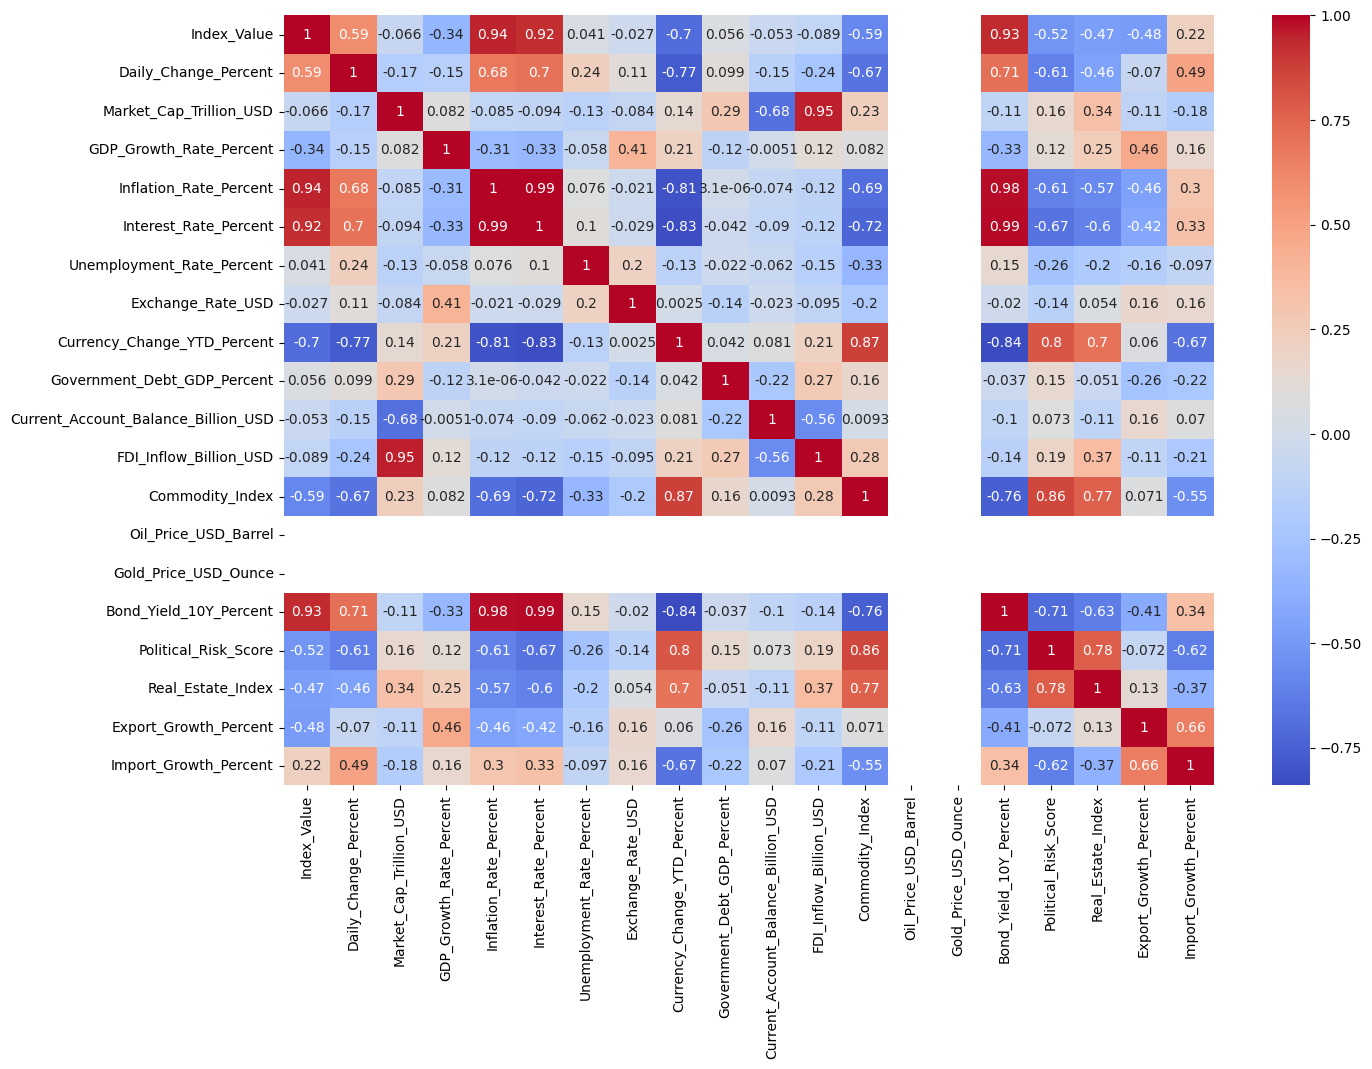

In [11]:
#checking correlation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(numeric_only= True), annot=True, cmap="coolwarm")
plt.show()

**Insight:** `Bond_Yield_10Y_Percent`, `Interest_Rate_Percent`, `Inflation_Rate_Percent` and `Index_Value` all have a significant correlation with `Daily_Change_Percent` - our target variable.

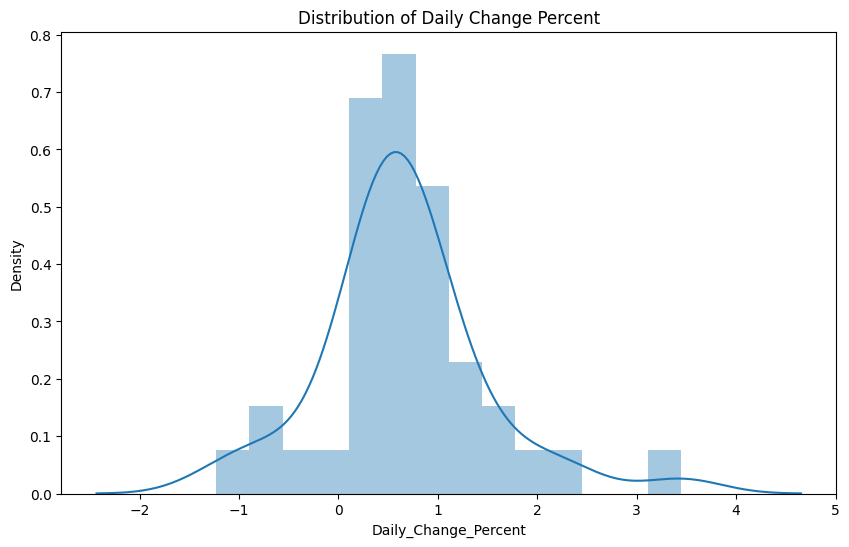

In [12]:
#distribution of target variable -> daily_change_percent
plt.figure(figsize=(10,6))
sns.distplot(data["Daily_Change_Percent"])
plt.title("Distribution of Daily Change Percent")
plt.show();

**Insight:** There is clustering around -1% and 2% which shows the normal movement on a daily basis. There is also an outlier around 3.2% which suggests that some days experience higher-than-usual volatility - possibly tied to macroeconomic shocks, political events, or commodity swings.

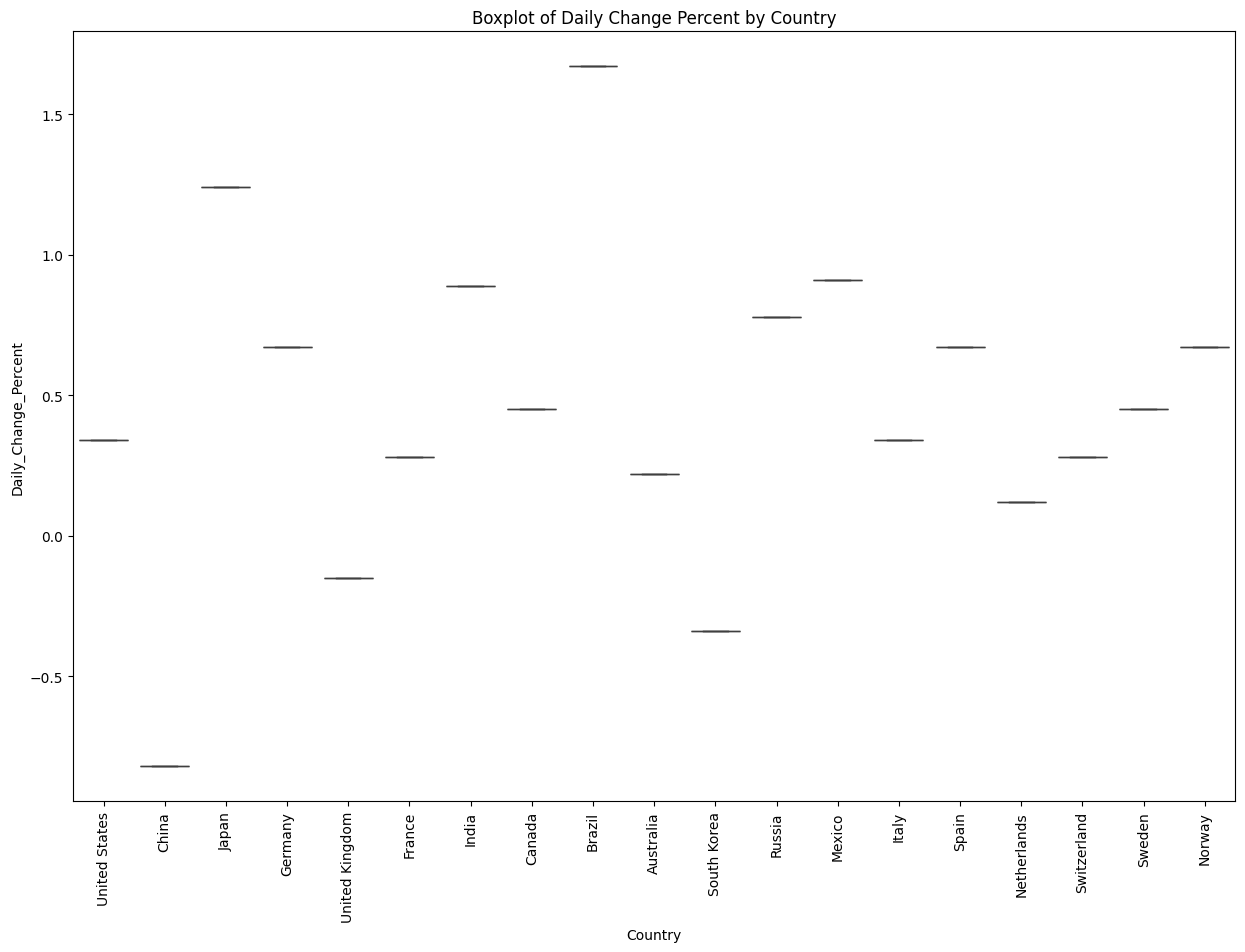

In [13]:
#boxplot by country top 19 countries -> which countries have the widest swings
country = data["Country"].value_counts().head(19).index
df_country = data[data["Country"].isin(country)]
plt.figure(figsize=(15,10))
sns.boxplot(x="Country", y="Daily_Change_Percent", data=df_country)
plt.xticks(rotation=90)
plt.title("Boxplot of Daily Change Percent by Country")
plt.show();

<Figure size 1500x1000 with 0 Axes>

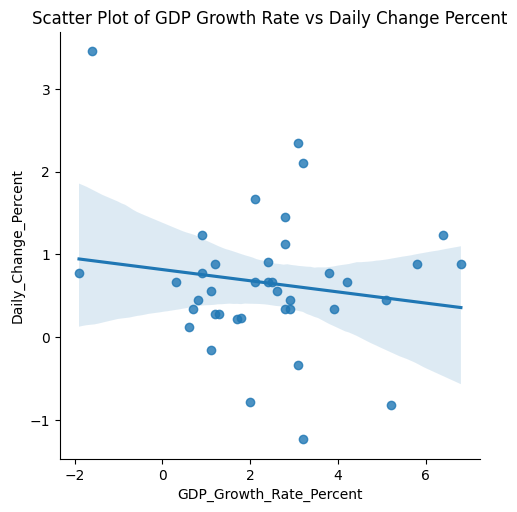

In [14]:
#scatter plots with regression lines
plt.figure(figsize = (15,10))
sns.lmplot(x="GDP_Growth_Rate_Percent", y="Daily_Change_Percent", data=data)
plt.title("Scatter Plot of GDP Growth Rate vs Daily Change Percent")
plt.show();

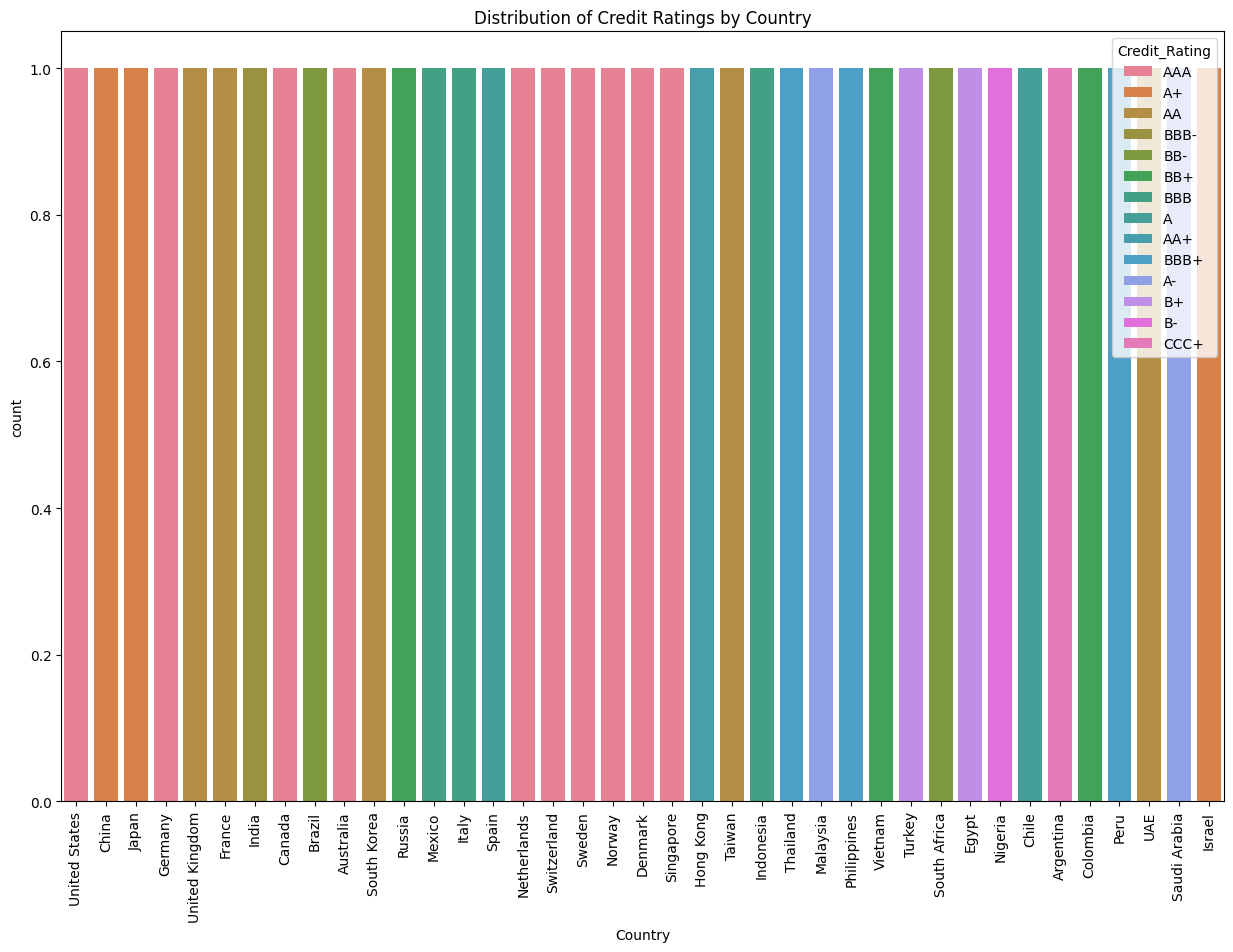

In [15]:
#distribution of credit ratings by country
plt.figure(figsize=(15,10))
sns.countplot(x="Country", hue="Credit_Rating", data=data)
plt.xticks(rotation=90)
plt.title("Distribution of Credit Ratings by Country")
plt.show();

In [20]:
#save the cleaned dataset as excel file
data.to_excel("cleaned_data.xlsx", index=False)
#data.to_csv("cleaned_data.csv", index=False)

## **Feature Engineering**

In [16]:
#interaction features
data["inflation_interest"] = data["Inflation_Rate_Percent"] * data["Interest_Rate_Percent"]
data["gdp_minus_unemp"] = data["GDP_Growth_Rate_Percent"] - data["Unemployment_Rate_Percent"]
data["oil_gold_ratio"] = data["Oil_Price_USD_Barrel"] / data["Gold_Price_USD_Ounce"]

## **Data Preparation**

In [17]:
#data splitting
X = data.drop("Daily_Change_Percent", axis = 1)
y = data["Daily_Change_Percent"]

X.head()

,Country,Date,Stock_Index,Index_Value,Market_Cap_Trillion_USD,GDP_Growth_Rate_Percent,Inflation_Rate_Percent,Interest_Rate_Percent,Unemployment_Rate_Percent,Currency_Code,...,Bond_Yield_10Y_Percent,Credit_Rating,Political_Risk_Score,Banking_Sector_Health,Real_Estate_Index,Export_Growth_Percent,Import_Growth_Percent,inflation_interest,gdp_minus_unemp,oil_gold_ratio
0,United States,2024-08-15,S&P_500,5437.2,51.2,2.8,2.9,5.50,3.7,USD,...,4.25,AAA,8.1,Strong,145.6,3.2,2.8,15.95,-0.9,0.031296
1,China,2024-08-15,Shanghai_Composite,2891.6,12.4,5.2,0.8,3.10,5.2,CNY,...,2.15,A+,6.7,Moderate,98.7,8.9,6.1,2.48,0.0,0.031296
2,Japan,2024-08-15,Nikkei_225,36789.1,6.8,0.9,2.8,-0.10,2.4,JPY,...,0.89,A+,8.4,Strong,89.3,5.1,4.7,-0.28,-1.5,0.031296
3,Germany,2024-08-15,DAX,18234.5,2.9,0.3,2.2,4.50,3.1,EUR,...,2.31,AAA,8.7,Strong,112.4,2.1,1.8,9.90,-2.8,0.031296
4,United Kingdom,2024-08-15,FTSE_100,8156.3,3.1,1.1,2.0,5.25,4.2,GBP,...,3.89,AA,7.9,Moderate,97.8,0.9,1.2,10.50,-3.1,0.031296


In [18]:
#scaling
numeric = X.select_dtypes(include = "float64").columns
scaler = StandardScaler()
X[numeric] = scaler.fit_transform(X[numeric])
X.head()

,Country,Date,Stock_Index,Index_Value,Market_Cap_Trillion_USD,GDP_Growth_Rate_Percent,Inflation_Rate_Percent,Interest_Rate_Percent,Unemployment_Rate_Percent,Currency_Code,...,Bond_Yield_10Y_Percent,Credit_Rating,Political_Risk_Score,Banking_Sector_Health,Real_Estate_Index,Export_Growth_Percent,Import_Growth_Percent,inflation_interest,gdp_minus_unemp,oil_gold_ratio
0,United States,2024-08-15,S&P_500,-0.221371,5.921885,0.207859,-0.236279,-0.238300,-0.477935,USD,...,-0.273309,AAA,0.639003,Strong,1.914650,-0.655835,-0.760912,-0.188252,0.510845,0.0
1,China,2024-08-15,Shanghai_Composite,-0.231706,1.163497,1.504897,-0.297362,-0.349490,-0.150160,CNY,...,-0.420484,A+,-0.201709,Moderate,-0.082320,0.263989,-0.272243,-0.191277,0.689616,0.0
2,Japan,2024-08-15,Nikkei_225,-0.094089,0.476719,-0.818963,-0.239187,-0.497744,-0.762006,JPY,...,-0.508790,A+,0.819156,Strong,-0.482566,-0.349227,-0.479557,-0.191897,0.391665,0.0
3,Germany,2024-08-15,DAX,-0.169417,-0.001572,-1.143223,-0.256640,-0.284629,-0.609045,EUR,...,-0.409271,AAA,0.999309,Strong,0.501017,-0.833345,-0.908994,-0.189611,0.133441,0.0
4,United Kingdom,2024-08-15,FTSE_100,-0.210332,0.022955,-0.710877,-0.262457,-0.249882,-0.368676,GBP,...,-0.298539,AA,0.518901,Moderate,-0.120641,-1.026992,-0.997843,-0.189476,0.073851,0.0


In [19]:
#encoding numeric
encoder = OneHotEncoder(drop = "first", sparse_output = False)
cat = X.select_dtypes(include = "object").columns
encoded = encoder.fit_transform(X[cat])
encoded = pd.DataFrame(encoded, columns = encoder.get_feature_names_out())
X = pd.concat([X.drop(cat, axis = 1), encoded], axis = 1)
X.head()

,Date,Index_Value,Market_Cap_Trillion_USD,GDP_Growth_Rate_Percent,Inflation_Rate_Percent,Interest_Rate_Percent,Unemployment_Rate_Percent,Exchange_Rate_USD,Currency_Change_YTD_Percent,Government_Debt_GDP_Percent,...,Credit_Rating_B+,Credit_Rating_B-,Credit_Rating_BB+,Credit_Rating_BB-,Credit_Rating_BBB,Credit_Rating_BBB+,Credit_Rating_BBB-,Credit_Rating_CCC+,Banking_Sector_Health_Strong,Banking_Sector_Health_Weak
0,2024-08-15,-0.221371,5.921885,0.207859,-0.236279,-0.238300,-0.477935,-0.279659,0.424693,1.284088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2024-08-15,-0.231706,1.163497,1.504897,-0.297362,-0.349490,-0.150160,-0.278284,0.541369,0.199661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-08-15,-0.094089,0.476719,-0.818963,-0.239187,-0.497744,-0.762006,-0.247654,-0.026795,4.291010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2024-08-15,-0.169417,-0.001572,-1.143223,-0.256640,-0.284629,-0.609045,-0.279677,0.516005,-0.037902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2024-08-15,-0.210332,0.022955,-0.710877,-0.262457,-0.249882,-0.368676,-0.279707,0.379036,0.729776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#dropping the date column since it is not needed
X = X.drop("Date", axis = 1)
X.head()

,Index_Value,Market_Cap_Trillion_USD,GDP_Growth_Rate_Percent,Inflation_Rate_Percent,Interest_Rate_Percent,Unemployment_Rate_Percent,Exchange_Rate_USD,Currency_Change_YTD_Percent,Government_Debt_GDP_Percent,Current_Account_Balance_Billion_USD,...,Credit_Rating_B+,Credit_Rating_B-,Credit_Rating_BB+,Credit_Rating_BB-,Credit_Rating_BBB,Credit_Rating_BBB+,Credit_Rating_BBB-,Credit_Rating_CCC+,Banking_Sector_Health_Strong,Banking_Sector_Health_Weak
0,-0.221371,5.921885,0.207859,-0.236279,-0.238300,-0.477935,-0.279659,0.424693,1.284088,-5.014717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.231706,1.163497,1.504897,-0.297362,-0.349490,-0.150160,-0.278284,0.541369,0.199661,2.581859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.094089,0.476719,-0.818963,-0.239187,-0.497744,-0.762006,-0.247654,-0.026795,4.291010,0.234044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.169417,-0.001572,-1.143223,-0.256640,-0.284629,-0.609045,-0.279677,0.516005,-0.037902,1.979404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.210332,0.022955,-0.710877,-0.262457,-0.249882,-0.368676,-0.279707,0.379036,0.729776,-0.719315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#splitting into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31, 147) (8, 147) (31,) (8,)


## **Model Building**

In [22]:
#setting random seed for reproducibility
np.random.seed(42)

In [23]:
#visualizing predictions
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     model = None,
                     predictions = None,
                     x_column = None,
                     x_label = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize = (10,7))
  if x_column and x_label:
    plt.scatter(train_data[x_column], train_labels, c = "b", label = "Training Data")
    plt.scatter(test_data[x_column], test_labels, c = "g", label = "Testing Data")
    plt.xlabel(x_label)
    plt.ylabel("Daily_Change_Percent")
  else:
    # If no specific column is provided, attempt to plot the first column
    plt.scatter(train_data.iloc[:, 0], train_labels, c = "b", label = "Training Data")
    plt.scatter(test_data.iloc[:, 0], test_labels, c = "g", label = "Testing Data")
    plt.xlabel(train_data.columns[0])
    plt.ylabel("Daily_Change_Percent")

  plt.title(f"Visualization of {model} Performance")

  if predictions is not None and model is not None:
    if x_column:
        plt.scatter(test_data[x_column], predictions, c = "r", label = "Predictions")
    else:
        plt.scatter(test_data.iloc[:, 0], predictions, c = "r", label = "Predictions")
    plt.title(f"{model} Predictions")

  plt.legend(prop = {"size": 14})

In [24]:
#make predictions
def train_make_predictions(model, X_train, y_train, X_test):
  """
  Trains a model and makes predictions on test data.
  """
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  return predictions

In [25]:
#model evaluation
def model_evaluation(y_test, predictions):
  """
  Evaluates a model's performance on test data.
  """
  mse = mean_squared_error(y_test, predictions)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, predictions)

  print(f"Model's Performance:")
  print(f"MSE: {mse:.2f}")
  print(f"RMSE: {rmse:.2f}")
  print(f"R2 Score: {r2:.2f}")

In [26]:
def plot_actual_vs_predicted(y_test, predictions, model_name="Model"):
    """
    Plots actual vs predicted values with a 45° reference line.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label="Perfect Fit (y=x)")

    plt.xlabel("Actual Daily_Change_Percent")
    plt.ylabel("Predicted Daily_Change_Percent")
    plt.title(f"Actual vs Predicted ({model_name})")
    plt.legend()
    plt.show()

In [27]:
#starting with baseline model -> LinearRegression
model_lr = LinearRegression()
predictions_lr = train_make_predictions(model_lr, X_train, y_train, X_test)

In [28]:
#model evaluation
model_evaluation(y_test, predictions_lr)

Model's Performance:
MSE: 1.12
RMSE: 1.06
R2 Score: -0.06


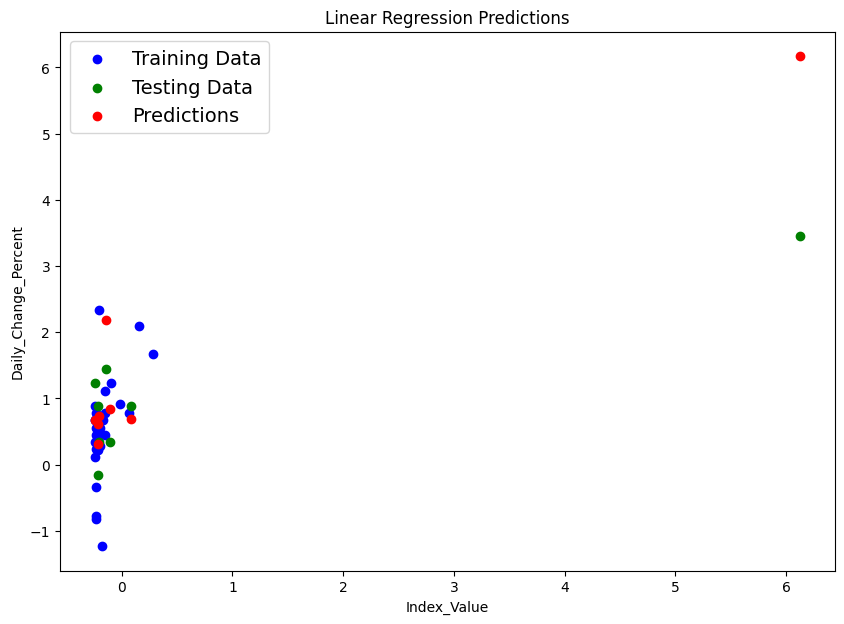

In [29]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 model = "Linear Regression",
                 predictions = predictions_lr)

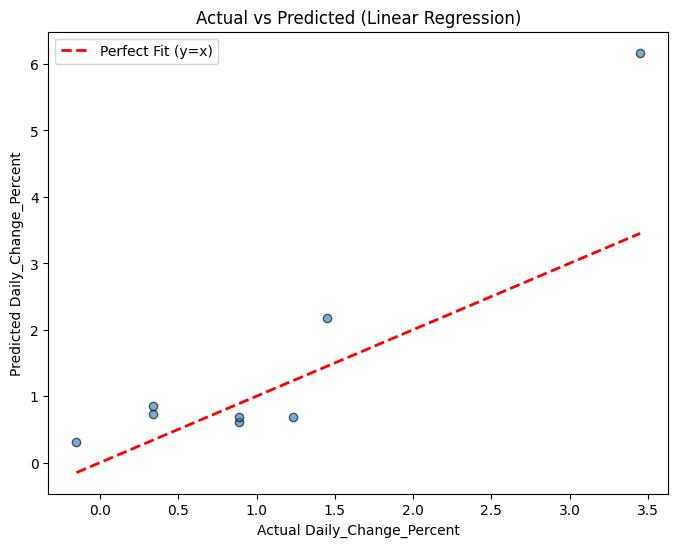

In [30]:
#visualizations for model -> LinearRegression
plot_actual_vs_predicted(y_test, predictions_lr, model_name="Linear Regression")

In [31]:
#trying out second model -> RandomForestRegressor
model_rf = RandomForestRegressor(random_state = 42)
predictions_rf = train_make_predictions(model_rf, X_train, y_train, X_test)

In [32]:
#evaluation
model_evaluation(y_test, predictions_rf)

Model's Performance:
MSE: 0.49
RMSE: 0.70
R2 Score: 0.54


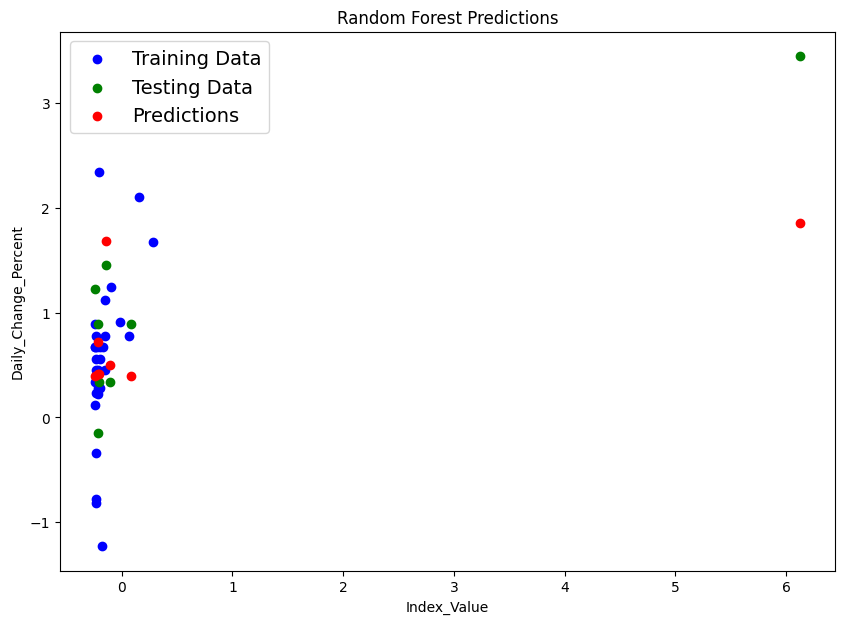

In [33]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 model = "Random Forest",
                 predictions = predictions_rf)

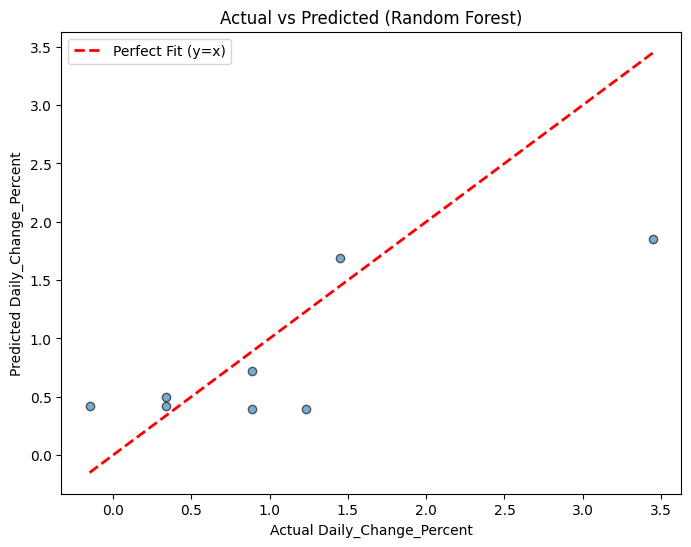

In [34]:
plot_actual_vs_predicted(y_test, predictions_rf, model_name="Random Forest")

In [35]:
#third model -> LGBMRegressor
model_lgbm = LGBMRegressor(n_estimators=80,  random_state=42)
predictions_lgbm = train_make_predictions(model_lgbm, X_train, y_train, X_test)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 0.550645
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM

In [36]:
#evaluation
model_evaluation(y_test, predictions_lgbm)

Model's Performance:
MSE: 1.31
RMSE: 1.14
R2 Score: -0.24


In [37]:
#ensemble models
model_xgb = XGBRegressor(n_estimators=80,  random_state=42)
predictions_xgb = train_make_predictions(model_xgb, X_train, y_train, X_test)


In [38]:
#make evaluations
model_evaluation(y_test, predictions_xgb)

Model's Performance:
MSE: 0.35
RMSE: 0.60
R2 Score: 0.66


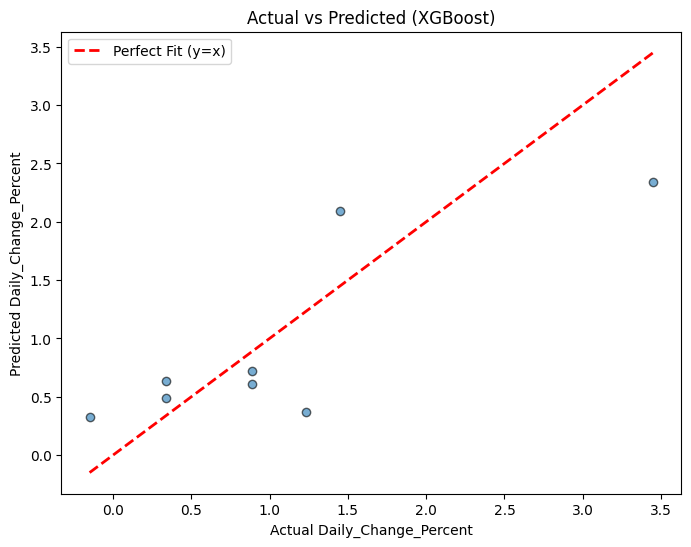

In [39]:
#visualization
plot_actual_vs_predicted(y_test, predictions_xgb, model_name="XGBoost")

In [40]:
#trying out model -> AdaBoostRegressor
model_ar = AdaBoostRegressor(random_state=42)
predictions_ar = train_make_predictions(model_ar, X_train, y_train, X_test)


In [41]:
#evaluations
model_evaluation(y_test, predictions_ar)

Model's Performance:
MSE: 0.42
RMSE: 0.65
R2 Score: 0.60


In [42]:
#model stacking
model_sr = StackingRegressor(estimators=
                             [("Linear Regression", model_lr),
                              ("Random Forest", model_rf),
                              ("LGBM", model_lgbm),
                              ("XGBoost", model_xgb),
                              ("AdaBoost", model_ar)],
                             final_estimator=LinearRegression())
predictions_sr = train_make_predictions(model_sr, X_train, y_train, X_test)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 0.550645
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM

In [43]:
#model evaluation
model_evaluation(y_test, predictions_sr)

Model's Performance:
MSE: 0.20
RMSE: 0.45
R2 Score: 0.81


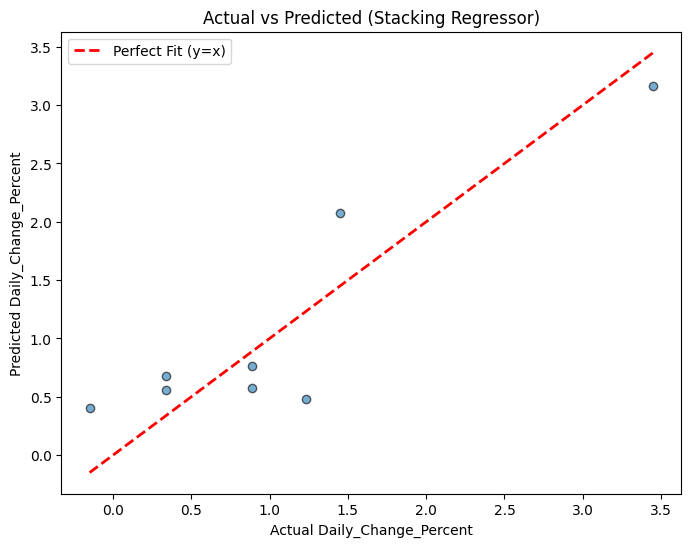

In [44]:
#model visualization
plot_actual_vs_predicted(y_test, predictions_sr, model_name="Stacking Regressor")

## **Saving the Best Model for Deployment**

In [46]:
#saving the best model for streamlit deployment -> Stacking regressor
joblib.dump(model_sr, "stacking_sr_model.pkl")

['stacking_sr_model.pkl']